In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE


##Read the data from google drive
######See data [here](https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data)


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Student Depression Dataset.csv')

###Data Profiling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.shape

(27901, 18)

In [6]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [8]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [9]:
df.nunique()

,0
id,27901
Gender,2
Age,34
City,52
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5


In [10]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [11]:
df.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


#EDA

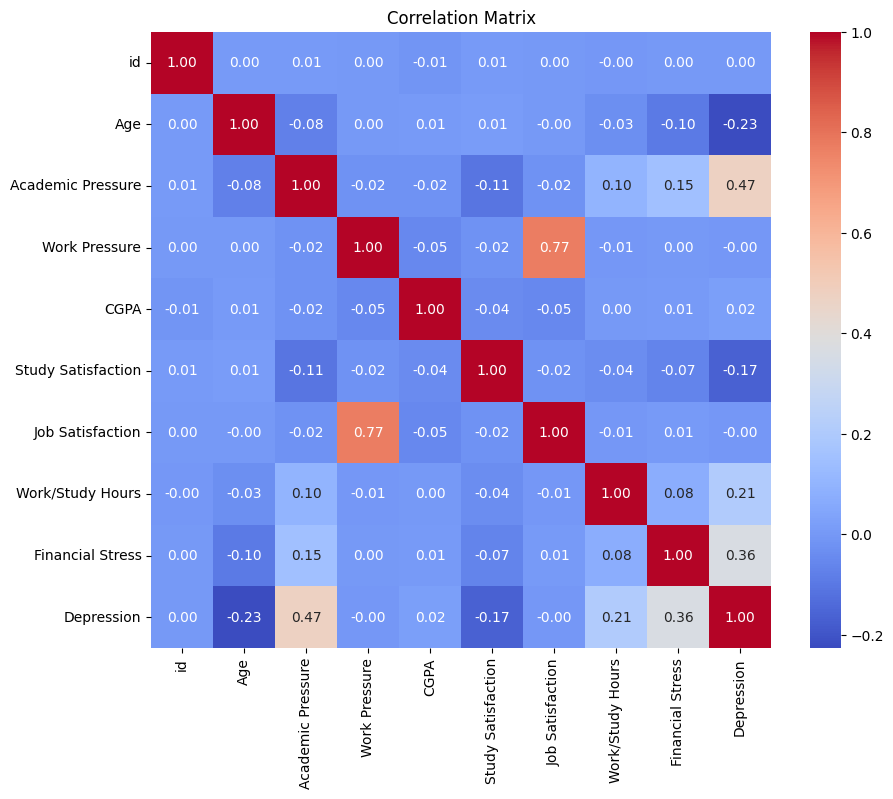

In [12]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Using Spearman**

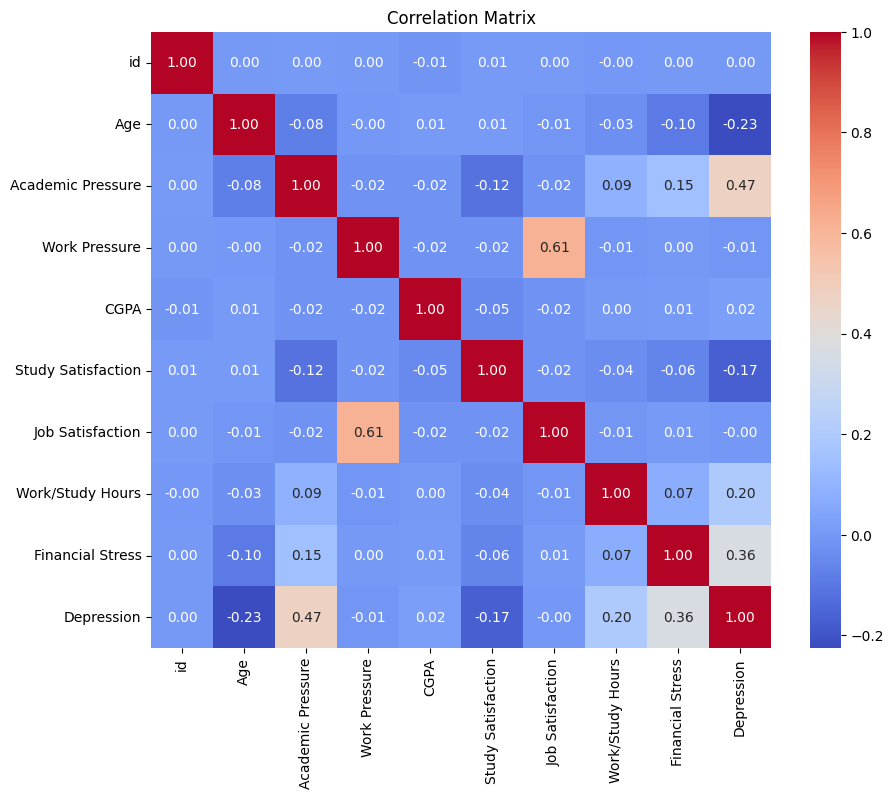

In [13]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr('spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##There are stronge correlation betweeen (Academic Pressure) & (Depression)

Correlation: 0.4748349439806618


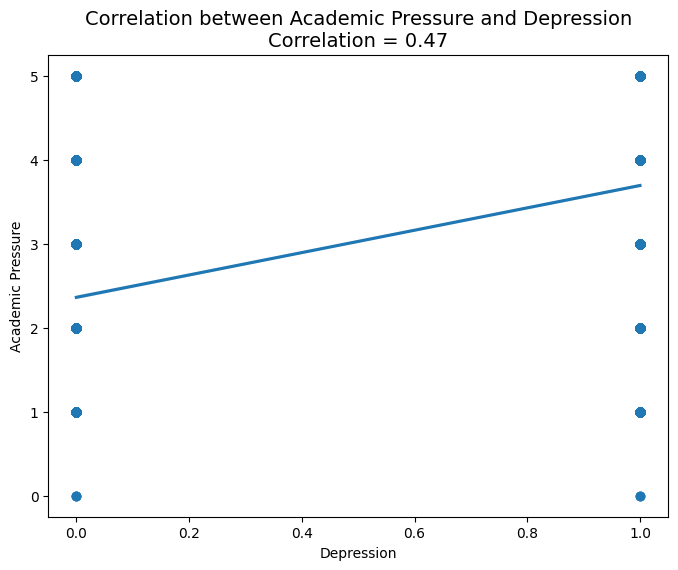

In [14]:
correlation = df['Academic Pressure'].corr(df['Depression'])
print(f"Correlation: {correlation}")

# Plot the correlation
plt.figure(figsize=(8, 6))
sns.regplot(x='Depression', y='Academic Pressure', data=df)
plt.title(f"Correlation between Academic Pressure and Depression\nCorrelation = {correlation:.2f}", fontsize=14)
plt.xlabel("Depression")
plt.ylabel("Academic Pressure")
plt.show()

####Numerical Columns: Plot histograms to understand distributions

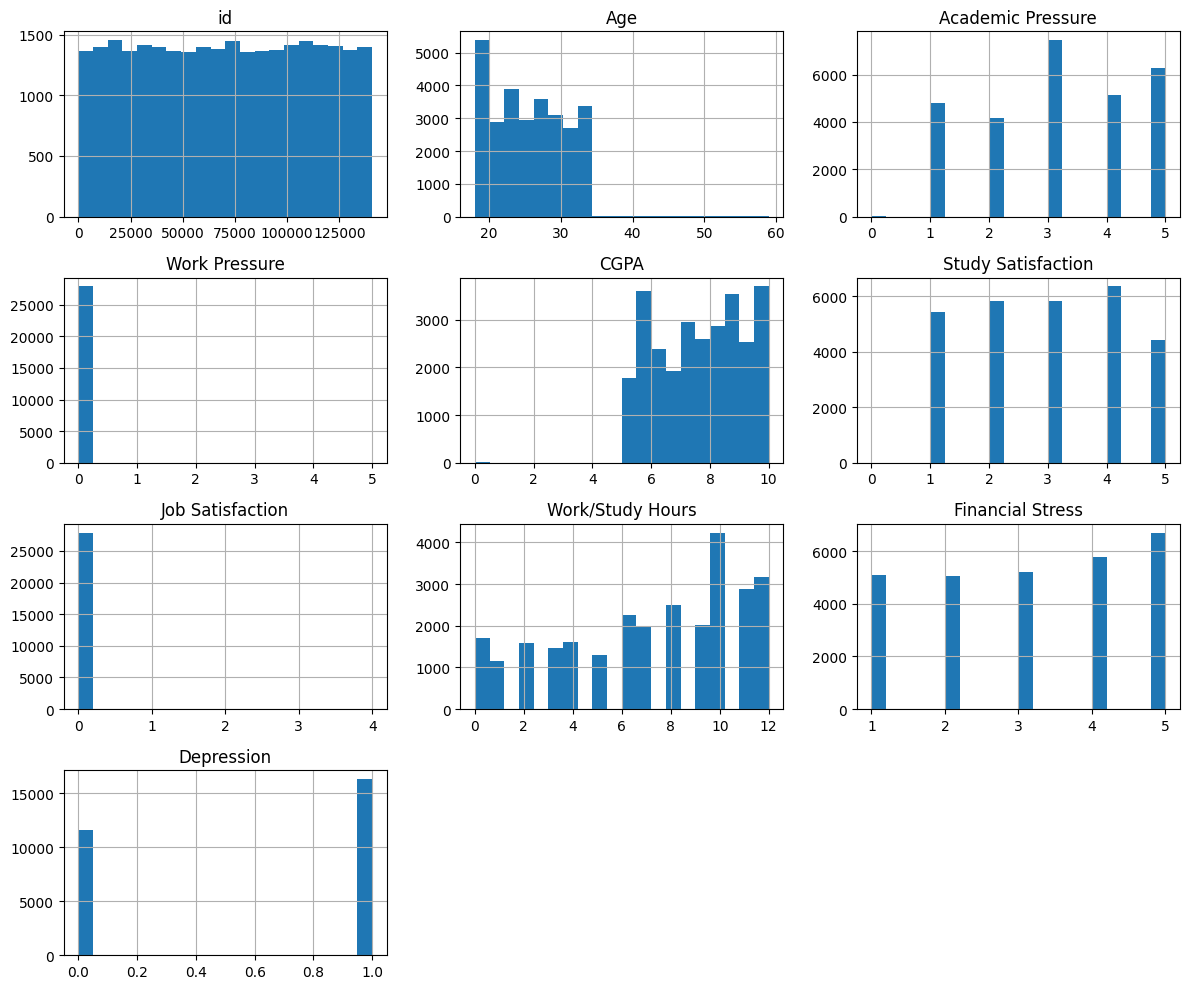

In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

###Distribution of Depression percentage by Ages





<ipython-input-16-57008e2d8f5c>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm", num_colors)


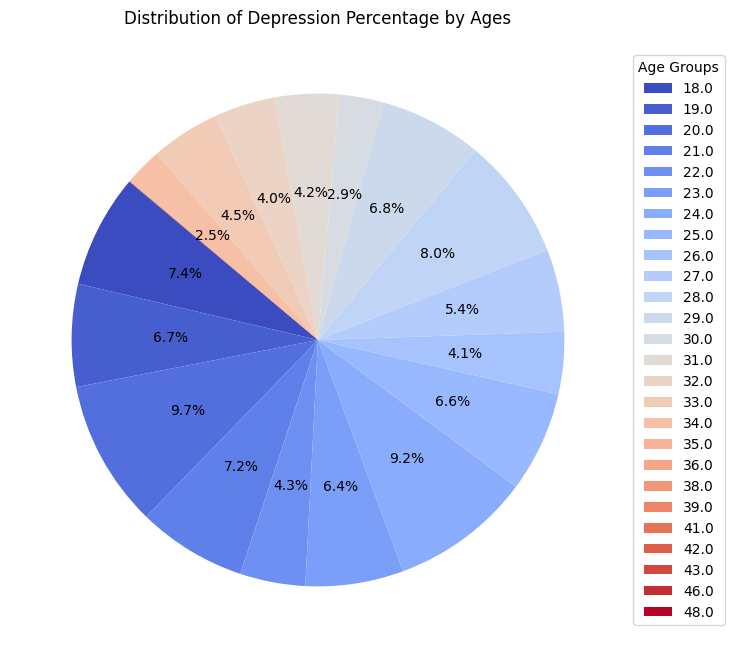

In [16]:
depression_only = df[df['Depression'] == 1]

age_depression = depression_only.groupby('Age')['Depression'].sum()

age_depression = age_depression[age_depression > 0]

num_colors = len(age_depression)
cmap = plt.cm.get_cmap("coolwarm", num_colors)
colors = [cmap(i) for i in range(num_colors)]

def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''  # Hide if less than 1%

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    age_depression,
    labels=None,
    autopct=autopct_format,
    startangle=140,
    colors=colors
)

plt.legend(patches, age_depression.index, title="Age Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Depression Percentage by Ages')
plt.show()


###Depression by financial stress


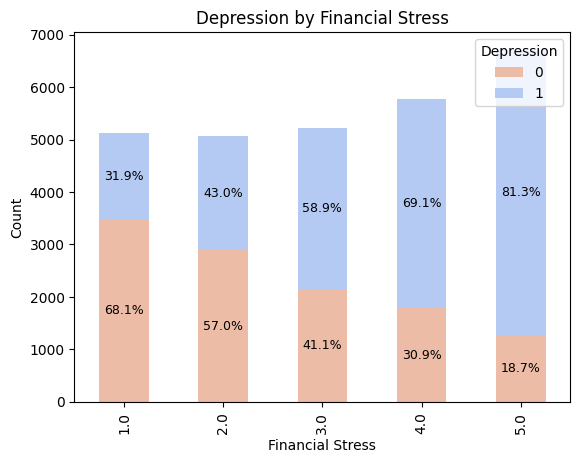

In [17]:
counts = df.groupby(['Financial Stress', 'Depression']).size().unstack()
colors = ['#ecbca7', '#b5caf3']

ax = counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Depression by Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Count')
plt.legend(title='Depression', loc='upper right')

for i, (stress_level, row) in enumerate(counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for value in row:
        if value > 0:
            percentage = value / total * 100
            ax.text(i, cumulative + value/2, f'{percentage:.1f}%',
                    ha='center', va='center', color='black', fontsize=9)
        cumulative += value

plt.show()


###Distribution of depression by the gender

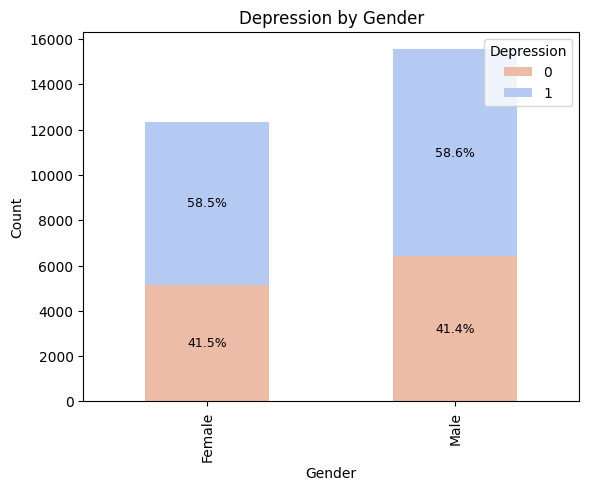

In [18]:
gender_counts = df.groupby(['Gender', 'Depression']).size().unstack()
colors = ['#ecbca7', '#b5caf3']

ax = gender_counts.plot(kind='bar', stacked=True,color=colors)
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression', loc='upper right')

for i, (stress_level, row) in enumerate(gender_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for value in row:
        if value > 0:
            percentage = value / total * 100
            ax.text(i, cumulative + value/2, f'{percentage:.1f}%',
                    ha='center', va='center', color='black', fontsize=9)
        cumulative += value

plt.show()


###Academic Pressure Distribution in Relation to Depression

<ipython-input-19-000dd763c818>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Academic Pressure', data=df, palette='coolwarm')


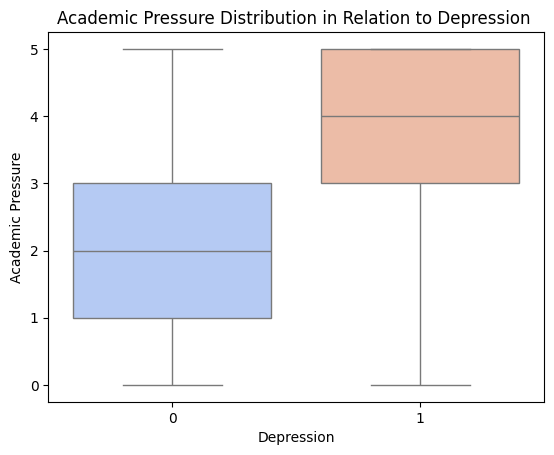

In [19]:
sns.boxplot(x='Depression', y='Academic Pressure', data=df, palette='coolwarm')
plt.title('Academic Pressure Distribution in Relation to Depression ')
plt.show()


###Dietary Habits with fequency

<ipython-input-20-d32c7d8dd0aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Dietary Habits',palette='coolwarm')


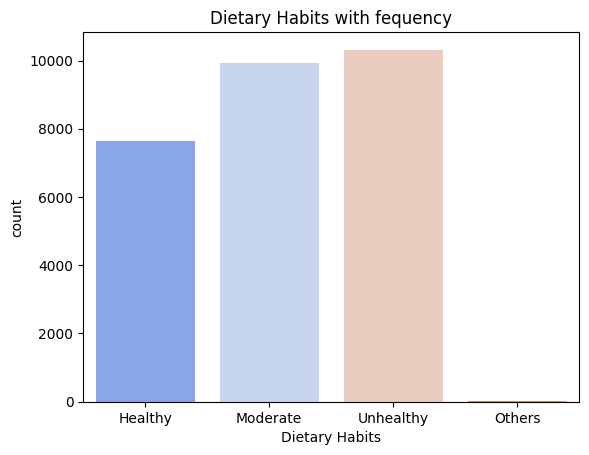

In [20]:
sns.countplot(df,x='Dietary Habits',palette='coolwarm')
plt.title("Dietary Habits with fequency")
plt.show()

###Frequency of Gender Representation

<ipython-input-21-60e9c342d856>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


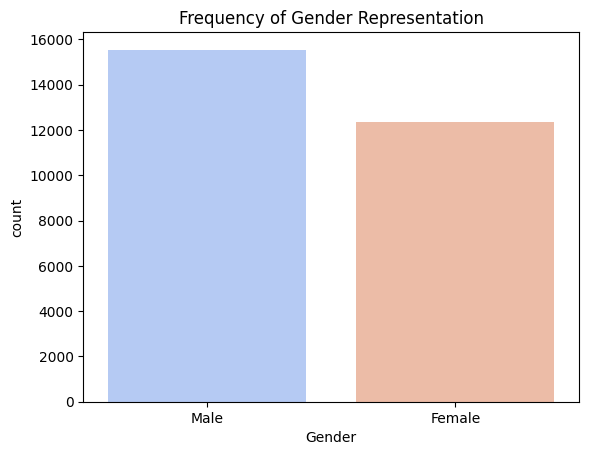

In [21]:
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title("Frequency of Gender Representation")
plt.show()

###Relationship Between Dietary Habits and Depression

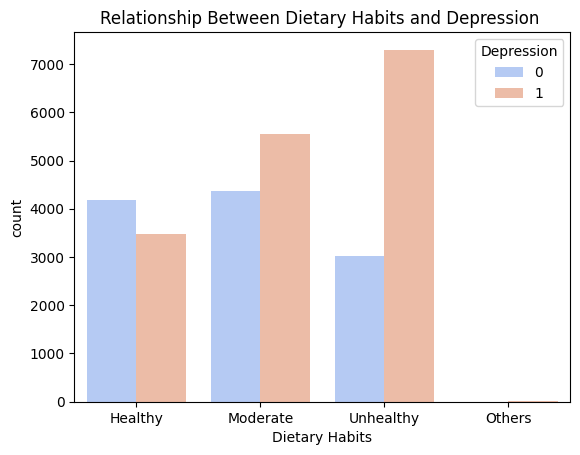

In [22]:
sns.countplot(x='Dietary Habits', hue='Depression', data=df,palette='coolwarm')
plt.title('Relationship Between Dietary Habits and Depression ')
plt.show()

###Impact of Academic Pressure on Suicidal Thoughts



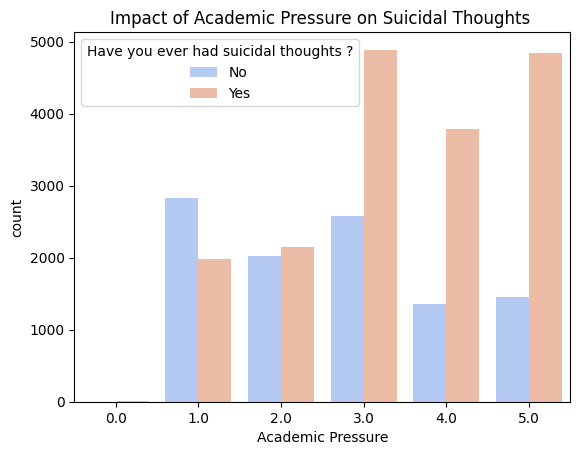

In [23]:
sns.countplot(x='Academic Pressure', hue='Have you ever had suicidal thoughts ?', data=df,palette='coolwarm')
plt.title('Impact of Academic Pressure on Suicidal Thoughts ')
plt.show()

# **Data Wrangling**



In [24]:
df=df.drop(columns=['id'])

####check the duplicaltes

In [25]:
df.drop_duplicates()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


####drop null rows that contains null values in Financial Stress

In [26]:
df.dropna(subset=['Financial Stress'], inplace=True)
df['Financial Stress']= df['Financial Stress'].astype(int)

In [27]:
df['Financial Stress'].value_counts()

,count
Financial Stress,
5,6715
4,5775
3,5226
1,5121
2,5061


Check the value_counts() in City column

In [28]:
df['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1339
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


####Remove cities that counts less than 400

In [29]:
cities_removed=df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(cities_removed.index)]

Check the value_counts() in Age column

In [30]:
df['Age'].value_counts()

,count
Age,
24.0,2258
20.0,2234
28.0,2132
29.0,1942
33.0,1893
25.0,1783
21.0,1721
23.0,1644
18.0,1586


####Remove Ages that age_counts less than 10




In [31]:
age_counts = df['Age'].value_counts()
df=df[df['Age'].isin(age_counts[age_counts > 10].index)]

Check the value_counts() in Profession &Study Satisfaction column

In [32]:
df['Profession'].value_counts()

,count
Profession,
Student,27792
Architect,8
Teacher,6
Digital Marketer,3
Content Writer,2
Chef,2
Doctor,2
Pharmacist,2
Civil Engineer,1


In [33]:
df['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6347
2.0,5825
3.0,5804
1.0,5429
5.0,4409
0.0,9


**Drop the rows that are not student**

In [36]:
df = df.loc[df['Profession'] == 'Student']

**Drop the profession column because it doesn't add any value**

In [37]:
df=df.drop(columns=['Profession'])

####Check the value counts of Job Satisfaction

In [38]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
0.0,27785
2.0,3
1.0,2
3.0,1
4.0,1


####Check the value counts of Study Satisfaction

In [39]:
df['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6338
2.0,5822
3.0,5795
1.0,5424
5.0,4404
0.0,9


**Delete rows that are 0 at Study Satisfaction column because less of value counts**

In [40]:
df=df[df['Study Satisfaction']>0]

**Delete Job Satisfaction column because it doesn't add any value**



In [41]:
df=df.drop(columns=['Job Satisfaction'])

Check the value_counts() in work pressure column

In [42]:
df['Work Pressure'].value_counts()

,count
Work Pressure,
0.0,27783


####Delete Work Pressure column due to delete Job Satisfaction column



In [43]:
df=df.drop(columns=['Work Pressure'])

Check the value_counts() in Academic Pressure column

In [44]:
df['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7429
5.0,6266
4.0,5141
1.0,4782
2.0,4164
0.0,1


####Delete Academic Pressure rows than are less that 1


In [45]:
df=df[df['Academic Pressure']>0]


####Check the value_counts() in Work/Study Hours & Sleep Duration & Dietary Habits column

In [46]:
df['Work/Study Hours'].value_counts()

,count
Work/Study Hours,
10.0,4222
12.0,3158
11.0,2882
8.0,2503
6.0,2241
9.0,2016
7.0,1994
0.0,1690
4.0,1607


In [47]:
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,8280
7-8 hours,7313
5-6 hours,6150
More than 8 hours,6021
Others,18


In [48]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10279
Moderate,9875
Healthy,7616
Others,12


####Delete others in Sleep Duration & Sleep Duration because less of value_counts()

In [49]:
df=df[df['Sleep Duration']!='Others']

In [50]:
df=df[df['Dietary Habits']!='Others']

####Check the value_counts() in Gender column

In [51]:
df['Gender'].value_counts()

,count
Gender,
Male,15473
Female,12279


####check the values of degree column

In [52]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

####Check the value_counts() of degree column

In [53]:
df['Degree'].value_counts()

,count
Degree,
Class 12,6054
B.Ed,1856
B.Com,1500
B.Arch,1473
BCA,1428
MSc,1181
B.Tech,1151
MCA,1035
M.Tech,1018


####Delete ('Others') in Degree because of less value_counts()

In [54]:
df = df[df['Degree'] != 'Others'].reset_index(drop=True)

####Grouping degrees into broader then encoding

In [55]:
degree_to_category_mapping = {
    'High School': ['Class 12'],
  'Under Grade': ['BSc', 'BCA','B.Ed','BHM', 'B.Pharm', 'B.Com','BE','BA','B.Arch','B.Tech', 'BBA','LLB'],
    'Graduate School': ['M.Tech','M.Ed', 'MSc','M.Pharm', 'MCA', 'MA','MD','MBBS', 'LLM','M.Com',
       'MBA','PhD' ]
}
category_mapping = {degree: category for category, degrees in degree_to_category_mapping.items() for degree in degrees}
df['Degree_Category'] = df['Degree'].map(category_mapping)


In [56]:
# category_to_numeric_mapping = {
#     'High School': 1,
#     'Under Grade': 2,
#     'Graduate School': 3
# }

# df['New_Degree'] = df['Degree_Category'].map(category_to_numeric_mapping)

## Encode categorical values columns into numerical values.

---




**Label encoding increased the accuracy more than One-hot-encoding**

**One-hot-encoding for all variables**

In [57]:
# df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
# df = pd.get_dummies(df, columns=['Profession'], prefix='Profession')
# df = pd.get_dummies(df, columns=['Dietary Habits'], prefix='Dietary Habits')
# df = pd.get_dummies(df, columns=['Degree_Category'], prefix='Degree_Category')
# df = pd.get_dummies(df, columns=['Sleep Duration'], prefix='Sleep Duration')
# df = pd.get_dummies(df, columns=['Have you ever had suicidal thoughts ?'], prefix='Have you ever had suicidal thoughts ?')
# df = pd.get_dummies(df, columns=['Family History of Mental Illness'], prefix='Family History of Mental Illness')
# df = pd.get_dummies(df, columns=['City'], prefix='City')


In [58]:
# mapping = {"Female": 1, "Male": 0}
# df['Gender'] = df['Gender'].map(mapping)

In [59]:
# mapping={
#     'Student':1,
#     'Others':2
# }
# df['Profession']=df['Profession'].map(mapping)

In [60]:
mapping={
    'Unhealthy':3,
    'Moderate':2,
    'Healthy':1
}
df['Dietary Habits']=df['Dietary Habits'].map(mapping)

In [61]:
mapping = {"Less than 5 hours": 1, "5-6 hours": 2, "7-8 hours":3, "More than 8 hours":4}
df['Sleep Duration'] = df['Sleep Duration'].map(mapping)

In [62]:
mapping={
    'No':0,
    'Yes':1
}
df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].map(mapping)

In [63]:
mapping={
    'No':0,
    'Yes':1
}
df['Family History of Mental Illness']=df['Family History of Mental Illness'].map(mapping)

####convert the data type of columns to int

In [64]:
df['Work/Study Hours'] = df['Work/Study Hours'].astype(int)

In [65]:
df['Academic Pressure'] = df['Academic Pressure'].astype(int)

In [66]:
df['Age'] = df['Age'].astype(int)

In [67]:
df['Study Satisfaction'] = df['Study Satisfaction'].astype(int)

####Detect the outliers in CGPA column then delete them

In [68]:
Q1 = df['CGPA'].quantile(0.25)
Q3 = df['CGPA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CGPA'] >= lower_bound) & (df['CGPA'] <= upper_bound)]

print(f"Original Data Size: {len(df)}")
print(f"Data Size after Removing Outliers: {len(df)}")

Original Data Size: 27715
Data Size after Removing Outliers: 27715


**Normalization**

In [69]:
scaler = MinMaxScaler()
df['CGPA'] = scaler.fit_transform(df[['CGPA']])

<ipython-input-69-7a65d3272b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CGPA'] = scaler.fit_transform(df[['CGPA']])


####Drop unnecessary column

In [70]:
df=df.drop(columns=['Degree','City','Gender','Degree_Category'])


#Save the data in CSV file after preprocessing for data analysis purposes

In [71]:
df.to_csv('data_after_preprocessing_finalversion.csv', index=False)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27715 entries, 0 to 27716
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    27715 non-null  int64  
 1   Academic Pressure                      27715 non-null  int64  
 2   CGPA                                   27715 non-null  float64
 3   Study Satisfaction                     27715 non-null  int64  
 4   Sleep Duration                         27715 non-null  int64  
 5   Dietary Habits                         27715 non-null  int64  
 6   Have you ever had suicidal thoughts ?  27715 non-null  int64  
 7   Work/Study Hours                       27715 non-null  int64  
 8   Financial Stress                       27715 non-null  int64  
 9   Family History of Mental Illness       27715 non-null  int64  
 10  Depression                             27715 non-null  int64  
dtypes: floa

#Modeling

In [73]:
x = df.drop(['Depression'],axis = 1)
y = df[['Depression']]

In [74]:
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state = 6, test_size = 0.20)

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [76]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


In [77]:
model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3,subsample=0.9)


In [78]:
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42, subsample=0.9)

In [79]:
y_pred = model.predict(X_test_scaled)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.26%


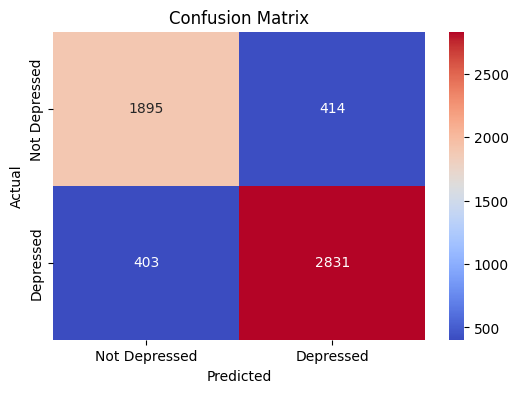

In [81]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

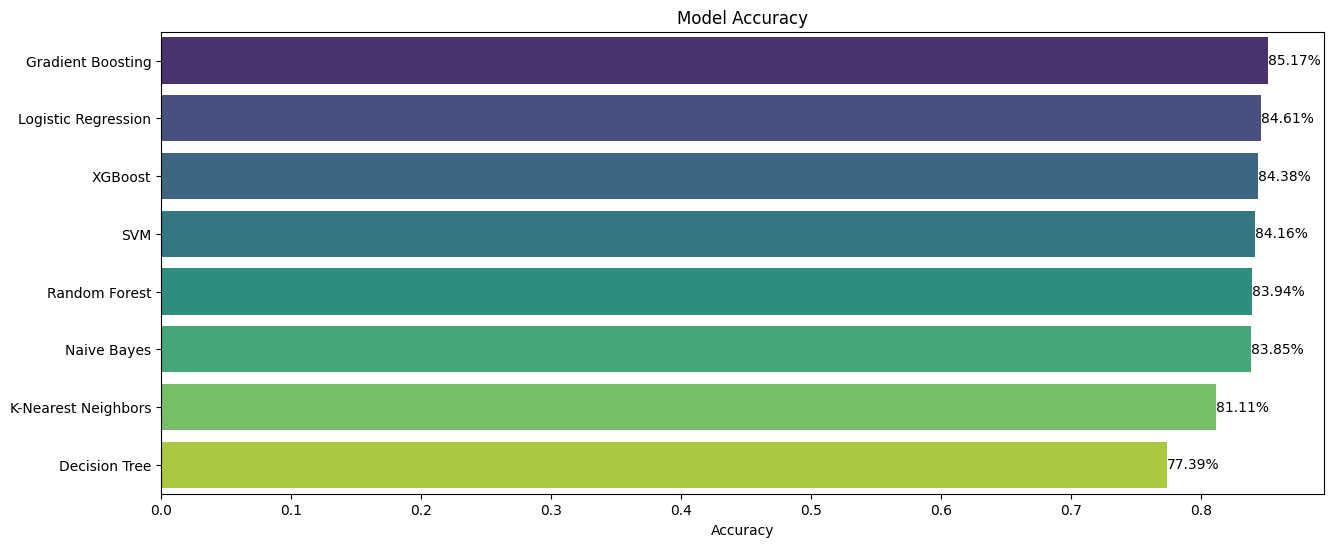

In [82]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(random_state=42)
    }

accuracy_results = {}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))


plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()),
            y=list(accuracy_results_ordened.keys()),
            palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

## LABELS
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()

<ipython-input-83-ac4347b015b2>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(feature_names))


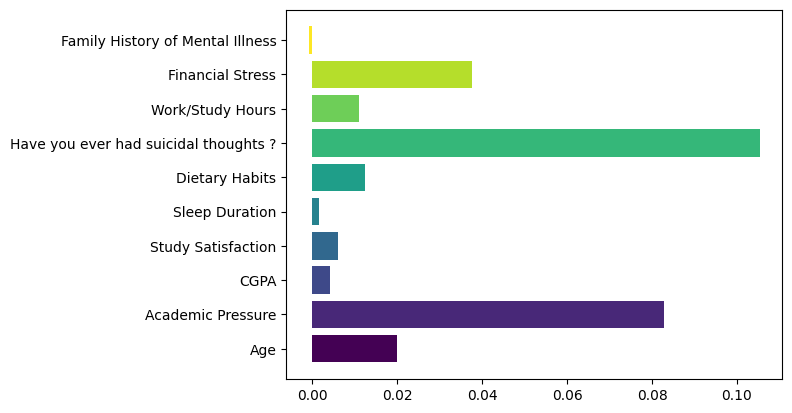

In [83]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import matplotlib.cm as cm

model.fit(X_resampled, y_resampled)

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

feature_names = x_train.columns

cmap = cm.get_cmap('viridis', len(feature_names))

colors = [cmap(i) for i in range(len(feature_names))]

plt.barh(range(len(result.importances_mean)), result.importances_mean, color=colors)
plt.yticks(range(len(result.importances_mean)), feature_names)

plt.show()

# Hyperparameter Tuning with RandomizedSearchCV


In [84]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier(random_state=42)

# param_distributions = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'subsample': [0.8, 0.9, 1.0],
# }


# rand_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=10,
#     cv=3,
#     scoring='accuracy',
#     n_jobs=-1,
#     random_state=42
# )

# rand_search.fit(X_train_scaled, y_train)

# print(f"Best Parameters: {rand_search.best_params_}")
# print(f"Best Accuracy: {rand_search.best_score_}")
